In [13]:
import os
import numpy as np
import torch

from torchvision import transforms
from torch.utils.data import Dataset
from PIL import Image
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

import albumentations as A
import random
from torchvision.utils import make_grid

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [20]:
class CustomImageDataset(Dataset):
    """
    We would normally for the training load also load the binary masks and apply on them only the rotation augmnetation to pair with the RGB images
    here bcs is just showcase we do only the RGB images.
    """
    def __init__(self, image_dir: str, transform=None):
        self.image_dir = image_dir
        self.transform = transform
        self.image_list = os.listdir(image_dir)
        self.augmentation = A.Compose([
            A.Rotate(limit=180, p=0.25),
            A.GaussianBlur(blur_limit=(3, 7), p=0.25),
            A.RandomBrightnessContrast(brightness_limit=0.4, contrast_limit=0.4, p=0.25),
            A.Sharpen(alpha=(0.3, 0.5), p=0.25),
            A.GaussNoise(var_limit=(30.0, 80.0), p=0.25)
        ])

    def __len__(self):
        return len(self.image_list)

    def __getitem__(self, idx):
        image_name = self.image_list[idx]
        image_path = os.path.join(self.image_dir, image_name)
        image = Image.open(image_path).convert("RGB")

        image_np = np.array(image)

        augmented = self.augmentation(image=image_np)
        image_augmented = Image.fromarray(augmented['image'])

        if self.transform:
            image_augmented = self.transform(image_augmented)

        return image_augmented

In [21]:
transform = transforms.Compose([
    transforms.ToTensor(),
])

In [22]:
showcase = CustomImageDataset(
    image_dir='PATH_TO_DATA',
    transform=transform
    )

In [23]:
batch_size = 12

train_loader = torch.utils.data.DataLoader(dataset=showcase,
                                           batch_size=batch_size,
                                           shuffle=False)

In [24]:
image_batch = next(iter(train_loader))

In [25]:
image_batch.shape

torch.Size([12, 3, 256, 256])

In [26]:
def show_images(images, num_images=12, nrow=3):
    images = images - images.min()
    images = images / images.max()

    grid_img = make_grid(images[:num_images], nrow=nrow, padding=2)

    npimg = grid_img.numpy()
    plt.figure(figsize=(15, 10))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

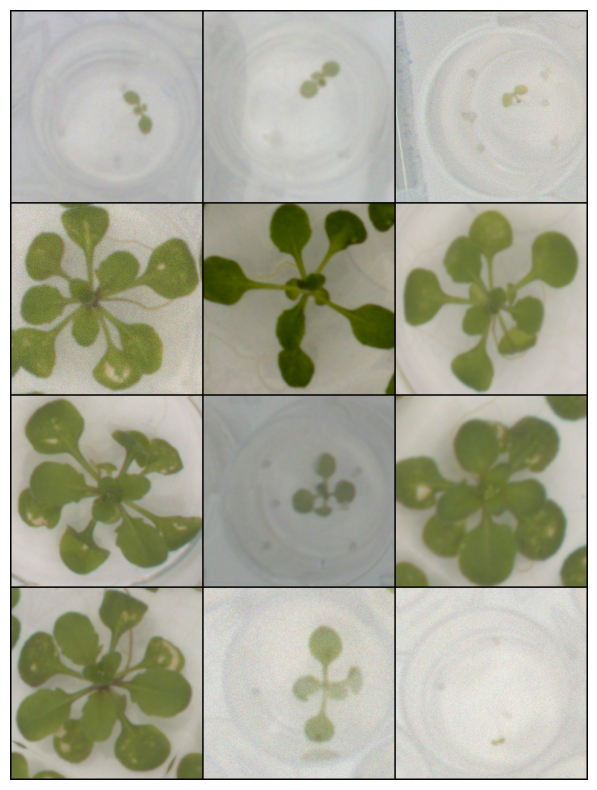

In [27]:
show_images(image_batch)